<img src="Film2.webp" alt="Film-Image" width="1000" height="300"/>

# Exploratory Data Analysis for New Movie Studio Insights

## Authors

1. Stephen Otieno
2. Immaculate Kithei
3. Augustine Komen
4. Godwin Mutuma
5. Sharleen Liz
6. Dennis Muuo

## Introduction

This project involves exploratory data analysis (EDA) focused on deriving business insights for a new movie studio. Our goal is to analyze film data and provide actionable recommendations to help guide the studio’s content creation strategy based on what types of films perform well at the box office.
This analysis seeks to provide strategic advice to a new movie studio by examining trends in movie success. As the entertainment industry evolves, more studios and streaming services are focusing on original content, making it crucial to understand what drives box office performance. By identifying patterns and trends in various data sets, this analysis aims to help the studio create films that are likely to be financially successful.

## Project Overview
### Business Problem
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

### Business Understandig

The company has decided to launch a new movie studio but lacks experience in the film industry. As data analysts, our task is to explore the film industry landscape and identify the characteristics of top-performing films at the box office. By analyzing these trends, we aim to provide the studio with insights that can guide their film production strategy.

The following are the business questions to be answered:
1. What genres are most successful at the box office?
2. How does the average rating correlate with box office success?
3. Which seasons do movie releases perform best?
4. What is the relationship between production_budget and worlwide_gross
5. Which are the top rated genres?

### Data Understanding

The data for this analysis is obtained from multiple reputable sources:

- **`Box Office Mojo:`** Provides comprehensive box office revenue data.
- **`IMDB:`** A rich source of movie ratings, genres, and other detailed movie information.
- **`Rotten Tomatoes:`** Offers critical and audience reviews and ratings.
- **`TheMovieDB:`** Contains detailed movie information, including genres, ratings, and runtime.
- **`The Numbers:`** Provides financial data on movie budgets and grosses.
The data represents a comprehensive collection of information on films, including their financial performance, ratings, genres, and other attributes. The sample includes a diverse range of films across different genres, time periods, and budgets.

We also utilized supplementary files from each data source to enhance our analysis.


## Data Cleaning and Preparation

The activities conducted include:

1. Handling missing values.
2. Removing duplicate values.
3. Standardizing columns.
4. Feature engineering.
5. Selecting important features.

<img src="Film1.jpg" alt="Film-Image" width="700"/>

## Importing the necessary libraries and Loading of the datasets

In [1]:
# Importing libraries

import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Connect to the SQLite database
conn = sqlite3.connect('im.db')

# Load relevant tables from the database
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# Close the connection
conn.close()


In [3]:
# Merge movie_basics and movie_ratings on 'movie_id'
# both tables are from the same database and share primary and foreign keys and explain one information 
imdb_data = pd.merge(movie_basics, movie_ratings, on='movie_id', how='left')


In [4]:
# Load other datasets with appropriate encoding
bnumbers_budgets = pd.read_csv('The Numbers.movie_budgets.csv.gz', encoding='latin1')
tmdb_movies = pd.read_csv('The Movie DB.movies.csv.gz', encoding='latin1')
rotten_reviews = pd.read_csv('Rotten Tomatoes.reviews.tsv.gz', sep='\t', encoding='latin1')
rotten_movie_info = pd.read_csv('Rotten Tomatoes.movie_info.tsv.gz', sep='\t', encoding='latin1')
bom_gross = pd.read_csv('bom.movie_gross.csv.gz', encoding='latin1')


In [5]:
# Display column names
rotten_movie_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [6]:
# Display the first five rows
bnumbers_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data Cleaning and Preparation

### Dataset 1: IMDB Data

In [7]:
#Checking if their missing values
imdb_data.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

In [8]:
#Filling in the missing values in the  imdb data
#Original column
#Since this column is a title, you can use primary_title values as a fill for the missing entries, as it’s reasonable to assume that if an original title is missing, the primary title may be similar.
imdb_data['original_title'].fillna(imdb_data['primary_title'], inplace=True)


In [9]:
#runtime column
#Movies in the same genre often have similar runtimes, so you could group by genres and fill missing runtimes with the median runtime for that genre.
# Fill missing runtime_minutes with the overall median runtime
imdb_data['runtime_minutes'].fillna(imdb_data['runtime_minutes'].median(), inplace=True)

In [10]:
#Genre column
#Use a placeholder like "Unknown", as filling this with an actual genre could mislead the data analysis.
imdb_data['genres'].fillna("Unknown", inplace=True)


In [11]:
#For missing values in both averagerating and numvotes, it's generally more informative to fill them with the overall mean instead of zeroes. Filling with zeroes may imply that these movies have poor ratings or no votes, which could misrepresent them in your analysis.
# Fill missing values in averagerating and numvotes with their respective overall means
imdb_data['averagerating'].fillna(imdb_data['averagerating'].mean(), inplace=True)
imdb_data['numvotes'].fillna(imdb_data['numvotes'].mean(), inplace=True)

In [12]:
#Confirming if the columns have know no missing values
imdb_data.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [13]:
#Checking for duplicates
imdb_data.duplicated().sum()

0

In [14]:
# Display the first 10 entries.
imdb_data.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.000000,77.000000
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.200000,43.000000
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.900000,4517.000000
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.100000,13.000000
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.500000,119.000000
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,6.332729,3523.662167
6,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",4.100000,32.000000
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.100000,263.000000
8,tt0139613,O Silêncio,O Silêncio,2012,87.0,"Documentary,History",6.332729,3523.662167
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,6.332729,3523.662167


There are no duplicate values

### Dataset 2: Numbers budgets dataset

In [15]:
# Checking the null values in the tn.movie_budgets file 
bnumbers_budgets .isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no missing values in the budget data

In [16]:
#Checking for duplicate values
bnumbers_budgets .duplicated().sum()

0

In [17]:
#Dispalay the first 10 entries.
bnumbers_budgets .head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At WorldÃ¢ÂÂs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


There are no duplicates in the numbers_budget data

### Dataset 3: TheMovieDB(tmdb)

In [18]:
#Checking if there are missing values
tmdb_movies.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

No missing values

In [19]:
#Cheking if there duplicate values
tmdb_movies.duplicated().sum() 

0

In [20]:
# Dispaly the columns 
tmdb_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

There are no duplicate values

##### Dropping Unnecessary Columns



In [21]:
tmdb_movies.drop("Unnamed: 0", axis = 1, inplace = True)


In [22]:
# Display first 10 entries
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### Dataset 4: Rotten reviews


In [23]:
#Checking if there are missing values
rotten_reviews.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [24]:
# Accessing the "rating" column in the rotten_reviews DataFrame
# This column contains ratings for movies from Rotten Tomatoes, which may be numerical or categorical.
rotten_reviews["rating"]

0          3/5
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
54427      NaN
54428      1/5
54429      2/5
54430    2.5/5
54431      3/5
Name: rating, Length: 54432, dtype: object

In [25]:
#Filling in the missing values
#review column
# Consider filling missing reviews with "No review available" to distinguish them from actual reviews.
rotten_reviews['review'].fillna("No review available", inplace=True)

#rating column
import numpy as np
# Step 1: Extract valid numeric ratings in the form "x/y"
numeric_ratings = rotten_reviews['rating'].str.extract(r'(\d+(\.\d+)?)/\d+').astype(float)

# Step 2: Assign numeric values back to `rating` and fill missing values with the median
rotten_reviews['rating'] = numeric_ratings[0]
rotten_reviews['rating'].fillna(rotten_reviews['rating'].median(), inplace=True)

In [26]:
rotten_reviews["rating"]

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
54427    3.0
54428    1.0
54429    2.0
54430    2.5
54431    3.0
Name: rating, Length: 54432, dtype: float64

In [27]:
# This command counts the number of reviews from each unique critic in the 'critic' column of the rotten_reviews DataFrame, allowing us to see which critics have reviewed the most films.
rotten_reviews["critic"].value_counts()

Emanuel Levy          595
Roger Ebert           461
Dennis Schwartz       413
Nell Minow            372
James Berardinelli    348
                     ... 
Debra Craine            1
Rebecca Addison         1
Paul O'Callaghan        1
Felix Hubble            1
Carolyn Cox             1
Name: critic, Length: 3496, dtype: int64

In [28]:
#  retrieve an array of unique publishers from the 'publisher' column of the rotten_reviews DataFrame, providing insight into the different publishers represented in the dataset.
rotten_reviews["publisher"].unique()

array(['Patrick Nabarro', 'io9.com', 'Stream on Demand', ...,
       'The Big Issue (Australia)', 'The Jacobin', 'OZY'], dtype=object)

In [29]:
#critic column
#You could fill missing values with "Unknown Critic" 
rotten_reviews['critic'].fillna("Unknown Critic", inplace=True)

#publisher column
#Consider filling missing values with "Unknown Publisher".
rotten_reviews['publisher'].fillna("Unknown Publisher", inplace=True)



In [30]:
# filter the rotten_reviews DataFrame to show all entries where the publisher is labeled as 'Unknown Publisher', allowing for analysis of reviews without a specified publisher.
rotten_reviews[rotten_reviews['publisher'] == 'Unknown Publisher']

,id,review,rating,fresh,critic,top_critic,publisher,date
325,10,The sight of Black burning down an entire admi...,2.0,rotten,Harry Guerin,0,Unknown Publisher,"April 1, 2003"
521,14,A captivating film... [Full review in Spanish],3.0,fresh,Laura Hiros,0,Unknown Publisher,"March 22, 2018"
776,23,Is there a better actress currently working in...,9.0,fresh,Michael Bonner,0,Unknown Publisher,"January 2, 2014"
1659,54,... a nostalgic journey - fantastic and surrea...,3.0,fresh,Hugo Hern,0,Unknown Publisher,"December 12, 2017"
1817,57,On the surface Silver Linings Playbook is a ra...,3.0,fresh,Mark Pfeiffer,0,Unknown Publisher,"February 4, 2013"
...,...,...,...,...,...,...,...,...
52931,1960,... its relevance grows in times when tempers ...,6.5,fresh,Hugo Hern,0,Unknown Publisher,"December 13, 2017"
53637,1976,"Bewtween spiritual, etnographic, and andventur...",3.0,fresh,Diego Batlle,0,Unknown Publisher,"March 2, 2016"
53659,1976,"A well constructed story in form and content, ...",3.0,fresh,Horacio Bilbao,0,Unknown Publisher,"February 18, 2016"
53674,1976,Guerra's film is not a recovery of that vanish...,3.0,fresh,Ernesto Diezmartinez,0,Unknown Publisher,"February 16, 2016"


In [31]:
#Confirming the missing values have been sorted
rotten_reviews.isnull().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [32]:
#Checking for duplicates
rotten_reviews.duplicated().sum()

9

In [33]:
# Drop all duplicates across the entire DataFrame
rotten_reviews.drop_duplicates(inplace=True)

#Checking if duplicates have been sorted
print(rotten_reviews.duplicated().sum())

0


In [34]:
# Display first 100 reviews
rotten_reviews.head(100)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3.0,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,3.0,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,3.0,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,3.0,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,3.0,fresh,Unknown Critic,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
95,3,"Sometimes, even a little gratuitous nudity can...",1.0,rotten,James Berardinelli,1,ReelViews,"August 16, 2012"
96,3,"Cronenberg turns a difficult, sometimes frustr...",3.0,rotten,Keith Phipps,1,AV Club,"August 16, 2012"
97,3,"Easier to admire than to love, David Cronenber...",7.5,fresh,Alison Willmore,0,Movieline,"August 15, 2012"
98,3,"Cosmopolis"" is Cronenberg's best film since ""e...",3.0,fresh,Jordan Hoffman,1,Film.com,"August 15, 2012"


In [35]:
# retrieve the unique IDs from the 'id' column of the rotten_reviews DataFrame, providing a list of distinct review identifiers for further analysis.
rotten_reviews['id'].unique()

array([   3,    5,    6, ..., 1998, 1999, 2000], dtype=int64)

Duplicates have beeen sorted

### Dataset 5: Rotten movie info 

In [36]:
#Checking for missing values
rotten_movie_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [37]:
# sorting runtime column to only remain with the values
# Step 1: Extract numeric part from the 'runtime' column
rotten_movie_info['runtime'] = rotten_movie_info['runtime'].str.extract('(\d+)')[0].astype(float)

# Step 2: Fill missing values with the median of the numeric runtime
rotten_movie_info['runtime'].fillna(rotten_movie_info['runtime'].median(), inplace=True)

# Optional: If you want to ensure that the runtime is always in a consistent format, you can convert it to integer type
rotten_movie_info['runtime'] = rotten_movie_info['runtime'].astype(int)


In [38]:
# Fill missing values for each column based on context
rotten_movie_info['synopsis'].fillna("No synopsis available", inplace=True)  
# Default text is used for missing synopses to indicate the absence of information.

rotten_movie_info['rating'].fillna(rotten_movie_info['rating'].mode()[0], inplace=True)  
# Using the mode for categorical ratings ensures that the most common rating is applied, maintaining the distribution.

rotten_movie_info['genre'].fillna("Unknown Genre", inplace=True)  
# A default value indicating unknown genre provides clarity and avoids confusion in analyses.

rotten_movie_info['director'].fillna("Unknown Director", inplace=True)  
# Filling with "Unknown Director" indicates the absence of a specified director, which is important for data completeness.

rotten_movie_info['writer'].fillna("Unknown Writer", inplace=True)  
# Similar to the director, this indicates a lack of available information regarding the writer.

rotten_movie_info['theater_date'].fillna("Unknown Date", inplace=True)  
# Filling with "Unknown Date" provides a placeholder for missing theater dates, maintaining consistency.

rotten_movie_info['dvd_date'].fillna("Unknown Date", inplace=True)  
# Using "Unknown Date" for missing DVD dates ensures uniformity in how missing dates are handled.

rotten_movie_info['currency'].fillna("USD", inplace=True)  
# Filling with "USD" as a default currency assumes a common currency, simplifying financial analyses.

rotten_movie_info['box_office'].fillna(0, inplace=True)  
# Filling with 0 assumes that if the box office is unknown, it can be treated as no revenue, which simplifies analysis.

rotten_movie_info['runtime'].fillna(rotten_movie_info['runtime'].median(), inplace=True)  
# Using the median for runtime provides a reasonable estimate without being skewed by outliers.

rotten_movie_info['studio'].fillna("Unknown Studio", inplace=True)  
# Filling with "Unknown Studio" maintains clarity about missing studio information.


In [39]:
#Confirm if all the missing values have been sorted
rotten_movie_info.isnull().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [40]:
rotten_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",USD,0,104,Unknown Studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",USD,0,116,Unknown Studio
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",USD,0,128,Unknown Studio
4,7,No synopsis available,NR,Drama|Romance,Rodney Bennett,Giles Cooper,Unknown Date,Unknown Date,USD,0,200,Unknown Studio


In [41]:
# count the occurrences of each unique currency in the 'currency' column of the rotten_movie_info DataFrame,providing insights into which currencies are most frequently used in the dataset.

rotten_movie_info["currency"].value_counts()

USD    1220
$       340
Name: currency, dtype: int64

In [42]:
#  Replace the dollar sign ($) with 'USD' in the 'currency' column of the DataFrame.
rotten_movie_info["currency"].replace("$", "USD", inplace = True)

In [43]:
# Count unique currencies in the 'currency' column.

rotten_movie_info["currency"].value_counts()

USD    1560
Name: currency, dtype: int64

In [44]:
rotten_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",USD,0,104,Unknown Studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",USD,"600,000",108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",USD,0,116,Unknown Studio
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",USD,0,128,Unknown Studio
4,7,No synopsis available,NR,Drama|Romance,Rodney Bennett,Giles Cooper,Unknown Date,Unknown Date,USD,0,200,Unknown Studio


In [45]:
# Count unique values in the 'box_office' column.
rotten_movie_info["box_office"].value_counts()

0              1220
20,900,803        2
600,000           2
32,000,000        2
200,000           2
               ... 
52,277,485        1
104,880,310       1
16,302,332        1
41,407,470        1
44,667,095        1
Name: box_office, Length: 337, dtype: int64

In [46]:
#Checking for duplicates
rotten_movie_info.duplicated().sum()

0

### Dataset 6: Bom gross

In [47]:
#Checking for missing values
bom_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [48]:
# Convert the relevant columns to string type to avoid AttributeError
bom_gross['domestic_gross'] = bom_gross['domestic_gross'].astype(str)
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].astype(str)

# Remove non-numeric characters and convert to numeric
bom_gross['domestic_gross'] = pd.to_numeric(bom_gross['domestic_gross'].str.replace(',', '').str.strip(), errors='coerce')
bom_gross['foreign_gross'] = pd.to_numeric(bom_gross['foreign_gross'].str.replace(',', '').str.strip(), errors='coerce')

# Fill missing values in 'studio' with the mode
bom_gross['studio'].fillna(bom_gross['studio'].mode()[0], inplace=True)

# Fill missing values in 'domestic_gross' with the median value
bom_gross['domestic_gross'].fillna(bom_gross['domestic_gross'].median(), inplace=True)

# Fill missing values in 'foreign_gross' with the median value
bom_gross['foreign_gross'].fillna(bom_gross['foreign_gross'].median(), inplace=True)


In [49]:
#Checking for duplicates
bom_gross.duplicated().sum()

0

In [50]:
#Renaming the movies column to allow merging 
bnumbers_budgets.rename(columns={'movie':'title'}, inplace = True)

In [51]:
#Check the new columns
bnumbers_budgets.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [52]:
bom_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18700000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,18700000.0,2018
3384,El Pacto,Sony,2500.0,18700000.0,2018
3385,The Swan,Synergetic,2400.0,18700000.0,2018


## Merging and Cleaning of Datasets

### 1. `The Numbers` and `Bom Gross`

In [53]:
# Merge 'bnumbers_budgets' and 'bom_gross' DataFrames on the 'title' column using a left join.
data_merge = pd.merge(bnumbers_budgets,bom_gross, on= 'title', how = 'left')
data_merge

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",BV,241100000.0,804600000.0,2011.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",BV,459000000.0,946400000.0,2015.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,NaN,NaN,NaN,NaN
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",NaN,NaN,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",NaN,NaN,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,NaN,NaN,NaN,NaN


In [54]:
# Calculates the number of missing values in each column of the merged DataFrame.

data_merge.isna().sum()

id                      0
release_date            0
title                   0
production_budget       0
domestic_gross_x        0
worldwide_gross         0
studio               4535
domestic_gross_y     4535
foreign_gross        4535
year                 4535
dtype: int64

In [55]:
# Remove rows with missing values from the merged DataFrame.
data_merge.dropna(inplace=True)

In [56]:
# Count the number of duplicate rows in the merged DataFrame.
data_merge.duplicated().sum()

0

### 2. `Rotten movie info` and `Rotten reviews`

In [57]:
# Display the contents of the 'rotten_movie_info' DataFrame.
rotten_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",USD,0,104,Unknown Studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",USD,"600,000",108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",USD,0,116,Unknown Studio
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",USD,0,128,Unknown Studio
4,7,No synopsis available,NR,Drama|Romance,Rodney Bennett,Giles Cooper,Unknown Date,Unknown Date,USD,0,200,Unknown Studio
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,Unknown Director,Unknown Writer,"Aug 18, 2006","Jan 2, 2007",USD,"33,886,034",106,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",USD,0,88,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,Unknown Writer,"Jan 1, 1962","May 11, 2004",USD,0,111,Unknown Studio
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",USD,0,101,Unknown Studio


In [58]:
# Display the contents of the 'rotten_reviews' DataFrame.
rotten_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3.0,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,3.0,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,3.0,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,3.0,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,3.0,fresh,Unknown Critic,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,3.0,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,No review available,1.0,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,No review available,2.0,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,No review available,2.5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [59]:
# Merge 'rotten_movie_info' and 'rotten_reviews' DataFrames on the 'id' column using a left join.
rotten_merged = pd.merge(rotten_movie_info, rotten_reviews, on = 'id',how = 'left')
rotten_merged

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",USD,0,104,Unknown Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",USD,"600,000",108,Entertainment One,A distinctly gallows take on contemporary fina...,3.0,fresh,PJ Nabarro,0.0,Patrick Nabarro,"November 10, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",USD,"600,000",108,Entertainment One,It's an allegory in search of a meaning that n...,3.0,rotten,Annalee Newitz,0.0,io9.com,"May 23, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",USD,"600,000",108,Entertainment One,... life lived in a bubble in financial dealin...,3.0,fresh,Sean Axmaker,0.0,Stream on Demand,"January 4, 2018"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",USD,"600,000",108,Entertainment One,Continuing along a line introduced in last yea...,3.0,fresh,Daniel Kasman,0.0,MUBI,"November 16, 2017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54843,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,Unknown Director,Luc Besson,"Sep 27, 2001","Feb 11, 2003",USD,0,94,Columbia Pictures,The real charm of this trifle is the deadpan c...,3.0,fresh,Laura Sinagra,1.0,Village Voice,"September 24, 2002"
54844,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,Unknown Director,Luc Besson,"Sep 27, 2001","Feb 11, 2003",USD,0,94,Columbia Pictures,No review available,1.0,rotten,Michael Szymanski,0.0,Zap2it.com,"September 21, 2005"
54845,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,Unknown Director,Luc Besson,"Sep 27, 2001","Feb 11, 2003",USD,0,94,Columbia Pictures,No review available,2.0,rotten,Emanuel Levy,0.0,EmanuelLevy.Com,"July 17, 2005"
54846,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,Unknown Director,Luc Besson,"Sep 27, 2001","Feb 11, 2003",USD,0,94,Columbia Pictures,No review available,2.5,rotten,Christopher Null,0.0,Filmcritic.com,"September 7, 2003"


In [60]:
# Calculate the number of missing values in each column of the 'rotten_merged' DataFrame.
rotten_merged.isna().sum()

id                0
synopsis          0
rating_x          0
genre             0
director          0
writer            0
theater_date      0
dvd_date          0
currency          0
box_office        0
runtime           0
studio            0
review          425
rating_y        425
fresh           425
critic          425
top_critic      425
publisher       425
date            425
dtype: int64

### 3.  `TMDB Movies` and ` IMDB data`

In [61]:
# Display the contents of the 'tmdb_movies' DataFrame.
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [62]:
# Display the contents of the 'imdb_data' DataFrame.
imdb_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.000000,77.000000
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.200000,43.000000
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.900000,4517.000000
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.100000,13.000000
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.500000,119.000000
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,6.332729,3523.662167
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary,6.332729,3523.662167
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy,6.332729,3523.662167
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,Unknown,6.332729,3523.662167


In [63]:
# Merge 'imdb_data' and 'tmdb_movies' DataFrames on the 'original_title' column using an inner join.
imdb_tmdb = pd.merge(imdb_data, tmdb_movies, on = 'original_title', how = 'inner')
imdb_tmdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.900000,4517.000000,"[35, 18]",299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",4.100000,32.000000,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26
2,tt4503112,Bigfoot,Bigfoot,2018,87.0,"Action,Horror",4.600000,9.000000,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26
3,tt9181914,Bigfoot,Bigfoot,2018,86.0,"Animation,Family",2.500000,55.000000,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.900000,8248.000000,"[16, 28, 35, 10751]",116977,en,4.705,2013-05-07,Foodfight!,2.1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20802,tt9678886,Vacancy,Vacancy,2018,81.0,Documentary,6.332729,3523.662167,"[35, 27]",475066,en,0.649,2017-10-27,Vacancy,9.0,1
20803,tt9777830,John Leguizamo's Latin History for Morons,John Leguizamo's Latin History for Morons,2018,87.0,Comedy,7.200000,105.000000,[35],557606,en,4.304,2018-11-05,John Leguizamo's Latin History for Morons,7.3,13
20804,tt9814730,The Flare,The Flare,2017,63.0,Sport,6.332729,3523.662167,[],469698,en,0.600,2017-07-11,The Flare,9.0,1
20805,tt9862978,Terra,Terra,2018,60.0,Documentary,6.332729,3523.662167,[27],536235,en,1.767,2018-04-24,Terra,5.0,1


In [64]:
#Checking for missing values in the meged dataset
imdb_tmdb.isna().sum()

movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
genre_ids            0
id                   0
original_language    0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [65]:
#Checking for duplicates
imdb_tmdb.duplicated().sum()

1100

In [66]:
#Dropping the duplicates
imdb_tmdb.drop_duplicates(inplace = True)
print(imdb_tmdb.duplicated().sum())

0


In [67]:
# get average of ratings from averagerating and vote_average columns 

imdb_tmdb['avg_rating'] = (imdb_tmdb['averagerating'] + imdb_tmdb['vote_average'])/2
imdb_tmdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,avg_rating
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.900000,4517.000000,"[35, 18]",299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64,6.950000
1,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",4.100000,32.000000,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,3.500000
2,tt4503112,Bigfoot,Bigfoot,2018,87.0,"Action,Horror",4.600000,9.000000,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,3.750000
3,tt9181914,Bigfoot,Bigfoot,2018,86.0,"Animation,Family",2.500000,55.000000,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,2.700000
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.900000,8248.000000,"[16, 28, 35, 10751]",116977,en,4.705,2013-05-07,Foodfight!,2.1,46,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20802,tt9678886,Vacancy,Vacancy,2018,81.0,Documentary,6.332729,3523.662167,"[35, 27]",475066,en,0.649,2017-10-27,Vacancy,9.0,1,7.666364
20803,tt9777830,John Leguizamo's Latin History for Morons,John Leguizamo's Latin History for Morons,2018,87.0,Comedy,7.200000,105.000000,[35],557606,en,4.304,2018-11-05,John Leguizamo's Latin History for Morons,7.3,13,7.250000
20804,tt9814730,The Flare,The Flare,2017,63.0,Sport,6.332729,3523.662167,[],469698,en,0.600,2017-07-11,The Flare,9.0,1,7.666364
20805,tt9862978,Terra,Terra,2018,60.0,Documentary,6.332729,3523.662167,[27],536235,en,1.767,2018-04-24,Terra,5.0,1,5.666364


In [68]:
#Getting the release year from release date column
imdb_tmdb['release_year'] = pd.to_datetime(imdb_tmdb['release_date'], format="%Y-%d-%m", 
    errors='coerce').dt.year
imdb_tmdb['release_month'] = pd.to_datetime(imdb_tmdb['release_date'], format="%Y-%d-%m", 
    errors='coerce').dt.month

imdb_tmdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,avg_rating,release_year,release_month
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.900000,4517.000000,"[35, 18]",299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64,6.950000,2018.0,2.0
1,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",4.100000,32.000000,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,3.500000,NaN,NaN
2,tt4503112,Bigfoot,Bigfoot,2018,87.0,"Action,Horror",4.600000,9.000000,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,3.750000,NaN,NaN
3,tt9181914,Bigfoot,Bigfoot,2018,86.0,"Animation,Family",2.500000,55.000000,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,2.700000,NaN,NaN
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.900000,8248.000000,"[16, 28, 35, 10751]",116977,en,4.705,2013-05-07,Foodfight!,2.1,46,2.000000,2013.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20802,tt9678886,Vacancy,Vacancy,2018,81.0,Documentary,6.332729,3523.662167,"[35, 27]",475066,en,0.649,2017-10-27,Vacancy,9.0,1,7.666364,NaN,NaN
20803,tt9777830,John Leguizamo's Latin History for Morons,John Leguizamo's Latin History for Morons,2018,87.0,Comedy,7.200000,105.000000,[35],557606,en,4.304,2018-11-05,John Leguizamo's Latin History for Morons,7.3,13,7.250000,2018.0,5.0
20804,tt9814730,The Flare,The Flare,2017,63.0,Sport,6.332729,3523.662167,[],469698,en,0.600,2017-07-11,The Flare,9.0,1,7.666364,2017.0,11.0
20805,tt9862978,Terra,Terra,2018,60.0,Documentary,6.332729,3523.662167,[27],536235,en,1.767,2018-04-24,Terra,5.0,1,5.666364,NaN,NaN


In [69]:
# Remove rows with missing values from the 'imdb_tmdb' DataFrame.
imdb_tmdb.dropna(inplace = True)

# Data Analysis

## 1. What genres are most successful at the box office?

In [70]:
#Merging the two merged datasets to answer the business questions
merged_data = pd.merge(data_merge,rotten_merged, on = 'id')

#Checking for missing values
merged_data.isna().sum()

#Dropping missing values
merged_data.dropna(inplace=True)

#Checking for duplicates
merged_data.drop_duplicates(inplace=True)

#Removing the '$' from the worldwide gross column
merged_data['worldwide_gross'] = pd.to_numeric(merged_data['worldwide_gross'].str.replace('$', '').str.replace(',', ''), errors='coerce')

genre_success = merged_data.groupby('genre')['worldwide_gross'].sum().reset_index()
sorted_genre_Success = genre_success.sort_values(by = 'worldwide_gross', ascending=True)
first_ten = sorted_genre_Success.tail(10)

In [71]:
# Save the top ten genres data to an Excel file
first_ten.to_excel('top_ten_genres.xlsx', index=False)

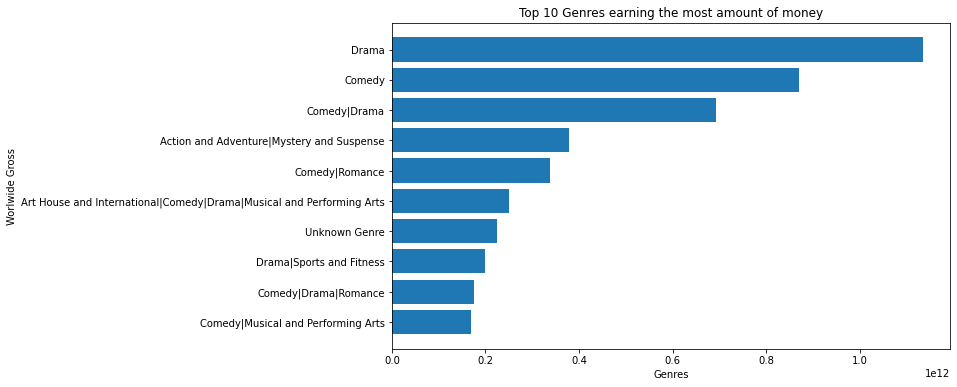

In [72]:
# Plotting a horizontal bar chart to show the top 10 genres by worldwide gross revenue

plt.figure(figsize=(10, 6))
plt.barh(first_ten['genre'], first_ten['worldwide_gross'])
plt.xlabel('Genres')
plt.ylabel('Worlwide Gross')
plt.title('Top 10 Genres earning the most amount of money')
plt.show()

### 1.1 Interpretation of the Visualization

The analysis shows that **Drama** is the most successful genre at the box office, followed by **Comedy** and **Comedy Drama**. This means that audiences like films that make them feel strong emotions and tell relatable stories.

**Action**, **Adventure**, **Mystery**, and **Suspense** genres are also popular, indicating that people enjoy exciting and escape-filled experiences.

Additionally, **Art House** and **International** films, as well as **Comedy/Drama/Musical** and **Performing Arts** films, also contribute to box office success. This highlights the increasing variety in audience preferences and suggests that smaller genres can also earn significant revenue.


## 2. How does the average rating correlate with box office success?

In [73]:
# Merge the IMDb and TMDb datasets on the primary title and start year, keeping only matching records
movie_data = pd.merge(imdb_tmdb, data_merge, left_on=['primary_title', 'start_year'], right_on=['title', 'year'], how='inner')


In [74]:
imdb_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [75]:
data_merge.head()

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",BV,241100000.0,804600000.0,2011.0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",BV,459000000.0,946400000.0,2015.0
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",BV,678800000.0,1369.5,2018.0
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",WB,229000000.0,428900000.0,2017.0
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",Sony,200100000.0,680600000.0,2015.0


In [76]:
# Convert the 'worldwide_gross' column to a numeric format by removing the dollar sign and commas, handling errors by coercing them to NaN
movie_data['worldwide_gross'] = pd.to_numeric(movie_data['worldwide_gross'].str.replace('$', '').str.replace(',', ''), errors='coerce')

# Calculate the correlation between average rating and worldwide gross, retrieving the correlation coefficient
correlation = movie_data[['avg_rating', 'worldwide_gross']].corr().iloc[0, 1]

# Print the correlation value
print(f'Correlation between average rating and worldwide gross: {correlation}')

Correlation between average rating and worldwide gross: 0.2980920291651277



The analysis of the movie dataset shows that the worldwide gross revenue has been converted into a numeric format for accurate calculations. By removing the dollar sign and commas, we ensure that the data can be processed effectively.

Furthermore, the correlation between the average rating and worldwide gross revenue has been calculated, yielding a correlation coefficient of approximately **0.298**. This suggests a moderate positive relationship between a movie's average rating and its worldwide gross, indicating that higher-rated films tend to generate more revenue at the box office. However, this correlation is not strong enough to imply causation, and other factors may also influence a film's financial success.


In [77]:
# Save the 'avg_rating' and 'worldwide_gross' columns from the movie_data DataFrame to a CSV file
movie_data[['avg_rating', 'worldwide_gross']].to_csv('movie_data', index = False)

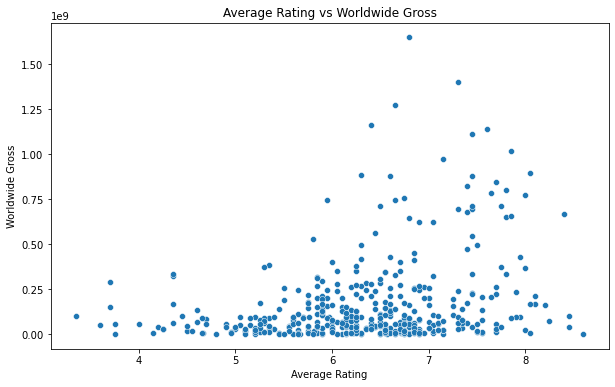

In [78]:
# Create a scatter plot to visualize the relationship between average rating and worldwide gross revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_data, x='avg_rating', y='worldwide_gross')
plt.title('Average Rating vs Worldwide Gross')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Gross')
plt.show()

### 2.1 Interpretation of the Visualization

The scatter plot illustrates a weak positive correlation between average rating and worldwide gross. While there is a slight tendency for higher-rated movies to generate more revenue, the relationship is not strong. This suggests that other factors, such as marketing, release date, and genre, play a more significant role in a film's box office success.
We also find that:
- Movies with lower average ratings (below 5) generally have lower worldwide gross, mostly below 0.25 billion dollars.

- Movies with average ratings between 5 and 7 show a wider range of worldwide gross, with some movies grossing up to 1 billion dollars.

- Movies with higher average ratings (above 7) tend to have higher worldwide gross, with several movies grossing over 1 billion dollars.

- There are a few outliers where movies with average ratings around 6 to 7 have exceptionally high worldwide gross, indicating that other factors might also play a significant role in box office success.


## 3. Which seasons do movie releases perform best?

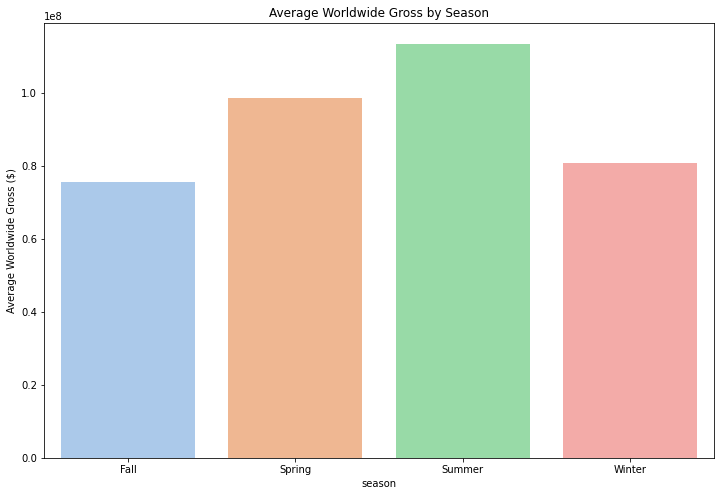

In [79]:
# Load the bnumbers_budgets dataset
# bnumbers_budgets = pd.read_csv('path_to_your_dataset.csv')

# Ensure release_date is in datetime format and extract month
bnumbers_budgets['release_date'] = pd.to_datetime(bnumbers_budgets['release_date'], errors='coerce')
bnumbers_budgets['month'] = bnumbers_budgets['release_date'].dt.month

# Convert worldwide_gross to numeric, forcing errors to NaN
if bnumbers_budgets['worldwide_gross'].dtype == 'object':
    bnumbers_budgets['worldwide_gross'] = pd.to_numeric(bnumbers_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', ''), errors='coerce')

# Function to define seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to get seasons
bnumbers_budgets['season'] = bnumbers_budgets['month'].apply(get_season)

# Aggregating data by season
seasonal_performance = bnumbers_budgets.groupby('season').agg({
    'worldwide_gross': 'mean'
}).reset_index()

# Plotting seasonal performance for worldwide gross with a different color palette
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='season', y='worldwide_gross', data=seasonal_performance, palette='pastel', ax=ax)  # Change palette
plt.title('Average Worldwide Gross by Season')
plt.ylabel('Average Worldwide Gross ($)')
plt.show()


### 3.1 Interpretation of the Visualization

The bar chart illustrates the average worldwide gross revenue by season. Summer emerges as the most lucrative season for movies, followed by Spring. Fall and Winter seasons show significantly lower average gross revenue.

In [80]:
# save the data into a csv file
seasonal_performance.to_csv('seasonal_performance', index = False)

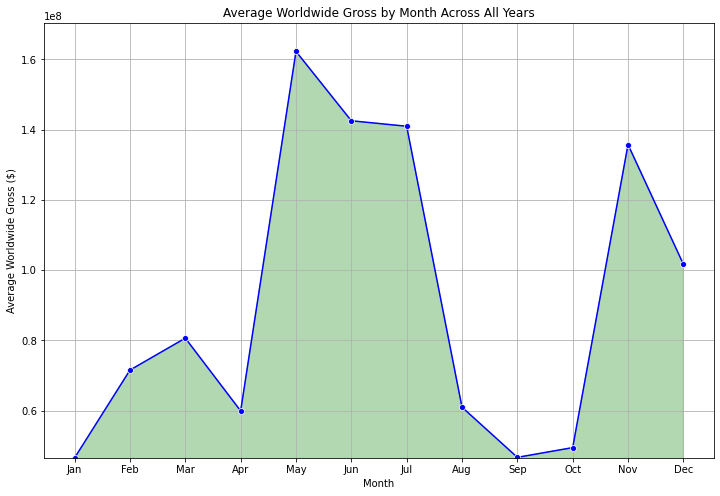

In [81]:
# Load the bnumbers_budgets dataset
# bnumbers_budgets = pd.read_csv('path_to_your_dataset.csv')

# Ensure release_date is in datetime format and extract month
bnumbers_budgets['release_date'] = pd.to_datetime(bnumbers_budgets['release_date'], errors='coerce')
bnumbers_budgets['month'] = bnumbers_budgets['release_date'].dt.month

# Convert worldwide_gross to numeric, ensuring to handle non-string types
# First, convert all values to strings and then remove '$' and ',' symbols
bnumbers_budgets['worldwide_gross'] = (
    bnumbers_budgets['worldwide_gross']
    .astype(str)
    .str.replace('$', '', regex=False)  # Remove the dollar sign
    .str.replace(',', '', regex=False)   # Remove commas
)

# Convert to numeric, forcing errors to NaN
bnumbers_budgets['worldwide_gross'] = pd.to_numeric(bnumbers_budgets['worldwide_gross'], errors='coerce')

# Group by month and calculate the average worldwide_gross for each month
monthly_trend = bnumbers_budgets.groupby('month')['worldwide_gross'].mean().reset_index()

# Plot the trend of average worldwide gross across the months
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the line graph with shading below the line
sns.lineplot(x='month', y='worldwide_gross', data=monthly_trend, marker='o', color='b', ax=ax)
ax.fill_between(monthly_trend['month'], monthly_trend['worldwide_gross'], color='green', alpha=0.3)

# Set the y-axis limit to start from the minimum value of worldwide_gross
ax.set_ylim(bottom=monthly_trend['worldwide_gross'].min())

# Customize plot
plt.title('Average Worldwide Gross by Month Across All Years')
plt.xlabel('Month')
plt.ylabel('Average Worldwide Gross ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Show the plot
plt.show()


### 3.2 Interpretation of the Visualization

The line chart illustrates the average worldwide gross revenue by month across all years. The chart reveals a distinct seasonal pattern with May and June emerging as the peak months for movie releases and revenue generation.

## 4. What is the relationship between `production_budget` and `worlwide_gross`

In [82]:
# Save he file into a csv file
monthly_trend.to_csv('monthly_trend', index = False)

In [83]:
# Displaying the dataset
bnumbers_budgets

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month,season
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625",2776345279,12,Winter
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1045663875,5,Spring
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350",149762350,6,Summer
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963,5,Spring
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1316721747,12,Winter
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,0,12,Winter
5778,79,1999-04-02,Following,"$6,000","$48,482",240495,4,Spring
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338",1338,7,Summer
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,0,9,Fall


In [84]:
# Convert 'production_budget' to numeric by removing '$' and ',' for correlation calculation with 'worldwide_gross'
bnumbers_budgets['production_budget'] = pd.to_numeric(
    bnumbers_budgets['production_budget'].str.replace('$', '').str.replace(',', ''), 
    errors='coerce'
)
bnumbers_budgets['production_budget'].corr(bnumbers_budgets['worldwide_gross'])

0.7483059765694753

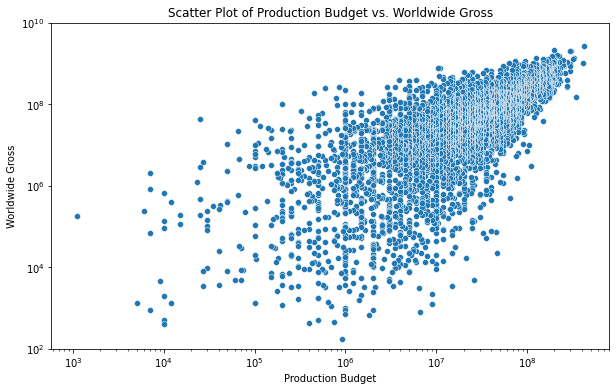

Correlation between Production Budget and Worldwide Gross: 0.75


In [95]:
# Scatter Plot for Production Budget vs. Worldwide Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bnumbers_budgets, x='production_budget', y='worldwide_gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.ylim(10**2, 10**10)
plt.title('Scatter Plot of Production Budget vs. Worldwide Gross')

# Setting logarithmic scale for better visibility
plt.xscale('log') 
plt.yscale('log')
plt.show()

# Calculating the correlation between production budget and worldwide gross
correlation = bnumbers_budgets[['production_budget', 'worldwide_gross']].corr().iloc[0, 1]
print(f'Correlation between Production Budget and Worldwide Gross: {correlation:.2f}')

### 4.1 Interpretation of the Visualization

* Correlation coefficient of 0.75 suggests a strong positive linear relationship between the production_budget and the worldwide_gross.
* The correlation suggests that movies with higher production budgets tend to have higher worldwide gross revenues. This is a strong positive relationship, but it does not guarantee that a higher budget will always lead to higher revenues, as there are other factors that could affect the outcome.

In [86]:
# save the dataset to a csv file
bnumbers_budgets[['worldwide_gross', 'production_budget']].to_csv('correlation', index = False)

## 5. Which are the top rated genres?

In [87]:
# Group by 'genres' and calculate the mean of 'avg_rating' for each genre
highly_rated_genres = imdb_tmdb.groupby('genres')['avg_rating'].mean()

# Sort genres by average rating in descending order and select the top 10
top_ten_highly_rated_genres = highly_rated_genres.sort_values(ascending=False).head(10)

# Display the result
top_ten_highly_rated_genres


genres
Documentary,Drama,Thriller       8.625000
Family,Romance                   8.550000
Documentary,Drama,Romance        8.450000
Animation,Documentary,Mystery    8.000000
Documentary,Fantasy,History      7.983182
Crime,Documentary,News           7.950000
Documentary,News,Reality-TV      7.900000
Animation,Comedy,Music           7.750000
Documentary,Western              7.650000
Documentary,Family,History       7.625000
Name: avg_rating, dtype: float64

### 5.1 Interpretation

The analysis shows that Documentary, Drama, Thriller is the highest-rated genre, with an average rating of 8.625. Genres that mix documentaries with drama, romance, family, history, or mystery also have high ratings. This suggests that audiences enjoy films with deep emotions, real-life stories, and content that makes them think.

In [88]:
# save the data into a csv file
top_ten_highly_rated_genres.to_csv('top_ten_highly_rated_genres', index = False)

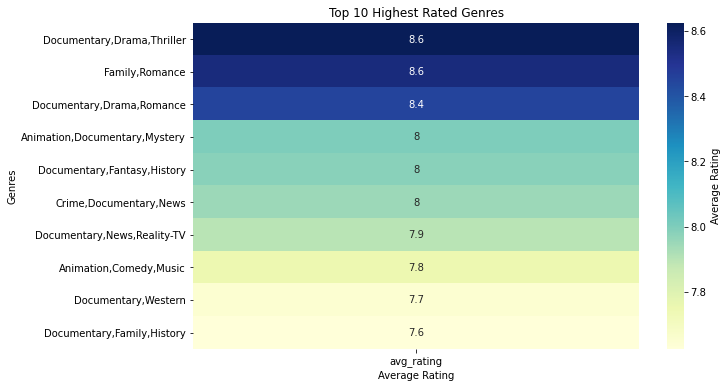

In [89]:
# Plotting a heatmap of the top 10 highly rated genres
plt.figure(figsize=(10, 6))
sns.heatmap(top_ten_highly_rated_genres.to_frame(), annot=True, cmap='YlGnBu', cbar_kws={'label': 'Average Rating'})
plt.title('Top 10 Highest Rated Genres')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()


### 5.2 Interpretation of the Visualization
The analysis shows that Documentary, Drama, Thriller is the highest-rated genre, with an average rating of 8.6. Genres that mix documentaries with drama, romance, family, history, or mystery also get high ratings. This suggests that people enjoy movies with deep emotions, real-life stories, and content that makes them think.

# Hypothesis Testing

Examining the relationship between movie ratings and worldwide gross revenues.

* Null hypothesis:There is no relationship between movie rating and worldwide gross¶
* Alternative hypothesis:Higher movie ratings are associated with higher worldwide gross.

In [93]:
from scipy.stats import pearsonr

# Assuming df contains 'rating' and 'worldwide_gross' columns
# significance level (alpha of 0.05)
correlation, p_value = pearsonr(movie_data['avg_rating'], movie_data['worldwide_gross'])

print(f"Correlation: {correlation}, p-value: {p_value}")

Correlation: 0.2980920291651275, p-value: 5.275145352208178e-10


Based on the Pearson correlation analysis, the p-value is approximately `5.275e-10`, which is significantly smaller than the common significance level (alpha) of `0.05`. This very low p-value provides strong evidence against the null hypothesis, indicating that the correlation observed is not due to random chance. Therefore, we reject the null hypothesis and conclude that there is a statistically significant positive relationship between higher movie ratings and higher worldwide gross.

In short, higher-rated movies indeed tend to earn more revenue.

# Regression Analysis

In [90]:
# Display columns
data_merge.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'studio', 'domestic_gross_y', 'foreign_gross',
       'year'],
      dtype='object')

In [91]:
# Remove '$' and ',' from production_budget and worldwide_gross columns, then convert to numeric
data_merge['production_budget'] = pd.to_numeric(data_merge['production_budget'].replace('[\$,]', '', regex=True))
data_merge['worldwide_gross'] = pd.to_numeric(data_merge['worldwide_gross'].replace('[\$,]', '', regex=True))

# Extract month from release_date
data_merge['release_month'] = pd.to_datetime(data_merge['release_date'], errors='coerce').dt.month

# Drop rows with missing values in relevant columns
data_merge.dropna(subset=['production_budget', 'release_month', 'worldwide_gross'], inplace=True)

# One-hot encode the release_month
data_merge = pd.get_dummies(data_merge, columns=['release_month'], drop_first=True)

# Define predictors and response variable
X = data_merge[['production_budget'] + [col for col in data_merge.columns if col.startswith('release_month_')]]
y = data_merge['worldwide_gross']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Linear Regression Results:
Mean Squared Error: 1.923168242574888e+16
R-squared: 0.5421374091600328


### Analyzing the Linear Regression Results

#### Key Metrics:

- **Mean Squared Error (MSE):** 1.923168242574888e+16  
- **R-squared:** 0.54213740 

#### Interpretations:

##### Mean Squared Error (MSE):
- This measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit of the model to the data.
- The high MSE value here suggests that the model's predictions are significantly different from the actual worldwide gross values.

##### R-squared:
- This metric represents the proportion of the variance in the dependent variable (worldwide gross) that is explained by the independent variables (production budget and release month).
- An R-squared of 0.54213740 means that about 54.21% of the variability in worldwide gross can be explained by the model. This indicates a relatively an average fit.




# Analysis Summary

Our analysis process included:
1. **Data Cleaning and Preprocessing**: We cleaned and merged datasets to ensure consistency across data sources.
2. **Exploratory Data Analysis (EDA)**: We analyzed various film attributes, such as genres, ratings, and box office performance.
3. **Visualization and Insights**: Visualizations highlight key findings and trends in successful films, which we translated into actionable recommendations.

# Key Findings

Our analysis revealed several characteristics of films that tend to perform well at the box office:
1. `Drama` is the top earner, followed by `Comedy` and combinations like `Comedy|Drama`. These genres have proven to be popular and lucrative in the film industry worldwide.
2. There is a positive correlation between average rating and worldwide gross. As the average rating increases, the worldwide gross tends to increase as well.
3. Summer emerges as the most lucrative season for movies, followed by Spring. Fall and Winter seasons show significantly lower average gross revenue.
4. Movies with higher production budgets tend to have higher worldwide gross revenues.

# Recommendations

Based on our findings, we suggest the following strategies for the studio:
1. **Focus on Producing Highly Profitable Genres**
    * Invest in producing `Drama`, `Comedy`, and `Comedy|Drama`. These genres have proven to be the most poplar and lucrative in the film industry worldwide
    * By targeting these genres, the studio can maximize profitability and achieve a higher returns.
    
2. **Invest in High-Quality Films:** 
    * The scatter plot showing a positive correlation between average ratings and worldwide gross revenues suggests that higher-rated films tend to perform better financially. This means that your studio should prioritize producing high-quality content that can achieve higher average ratings. Quality scripts, talented directors, and experienced actors should be the focus.
3. **Leverage Seasonal and Monthly Release Trends:**

    * Release Films During Summer - The data shows that movies released in the summer perform the best, with an average worldwide gross of 113M dollars. This season sees a higher audience turnout, leading to better box office performance.
    * Avoid Fall Releases - Films released in the fall tend to perform the worst, with an average worldwide gross of 75M dollars. Planning releases outside of this season can help in maximizing box office returns.
4. **Invest in High Production Budgets:** 
    * The scatter plot showing a positive correlation between production budget and worldwide gross means that movies with higher production budgets tend to generate higher box office revenues. Allocate substantial budgets to your movie projects to increase the likelihood of financial success. 


## Overall Conclusion:

Based on our analysis, it's clear that to achieve box office success, your new movie studio should focus on producing high-quality films in the `Drama`, `Comedy`, and `Comedy|Drama` genres, which are currently the top earners. Additionally, there is a positive correlation between higher average ratings and increased worldwide gross revenues, emphasizing the importance of investing in `quality scripts`, `talented directors`, and `experienced actors`.

To capitalize on market trends, prioritize releasing films during the lucrative `Summer` season while avoiding `Fall` releases due to their lower average gross revenue. Furthermore, allocating substantial production budgets is crucial, as higher-budget films tend to generate higher box office revenues. By implementing these strategies, your studio can maximize profitability and achieve significant returns in the competitive film industry.